**[Geospatial Analysis Home Page](https://www.kaggle.com/learn/geospatial-analysis)**

---


In [2]:
import pandas as pd
import geopandas as gpd

from shapely.geometry import LineString

from learntools.core import binder
binder.bind(globals())
from learntools.geospatial.ex2 import *

In [3]:
# Load the data and print the first 5 rows
birds_df = pd.read_csv("../input/geospatial-learn-course-data/purple_martin.csv", parse_dates=['timestamp'])
print("There are {} different birds in the dataset.".format(birds_df["tag-local-identifier"].nunique()))
birds_df.head()

There are 11 different birds in the dataset.


,timestamp,location-long,location-lat,tag-local-identifier
0,2014-08-15 05:56:00,-88.146014,17.513049,30448
1,2014-09-01 05:59:00,-85.243501,13.095782,30448
2,2014-10-30 23:58:00,-62.906089,-7.852436,30448
3,2014-11-15 04:59:00,-61.776826,-11.723898,30448
4,2014-11-30 09:59:00,-61.241538,-11.612237,30448


There are 11 birds in the dataset, where each bird is identified by a unique value in the "tag-local-identifier" column.  Each bird has several measurements, collected at different times of the year.

Use the next code cell to create a GeoDataFrame `birds`.  
- `birds` should have all of the columns from `birds_df`, along with a "geometry" column that contains Point objects with (longitude, latitude) locations.  
- Set the CRS of `birds` to `{'init': 'epsg:4326'}`.

In [4]:
# Create the GeoDataFrame
birds = gpd.GeoDataFrame(birds_df,geometry = gpd.points_from_xy(birds_df['location-long'],birds_df['location-lat']))
# Your code here: Set the CRS to {'init': 'epsg:4326'}
birds.crs = {'init': 'epsg:4326'}

birds.head()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

,timestamp,location-long,location-lat,tag-local-identifier,geometry
0,2014-08-15 05:56:00,-88.146014,17.513049,30448,POINT (-88.14601429999998 17.5130487)
1,2014-09-01 05:59:00,-85.243501,13.095782,30448,POINT (-85.24350059999998 13.0957817)
2,2014-10-30 23:58:00,-62.906089,-7.852436,30448,POINT (-62.9060891 -7.852436099999998)
3,2014-11-15 04:59:00,-61.776826,-11.723898,30448,POINT (-61.77682579999999 -11.7238981)
4,2014-11-30 09:59:00,-61.241538,-11.612237,30448,POINT (-61.2415383 -11.6122369)


In [5]:
# Load a GeoDataFrame with country boundaries in North/South America, print the first 5 rows
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
print(world.head())
americas = world.loc[world['continent'].isin(['North America', 'South America'])]
americas.head()

     pop_est      continent                      name iso_a3  gdp_md_est  \
0     920938        Oceania                      Fiji    FJI      8374.0   
1   53950935         Africa                  Tanzania    TZA    150600.0   
2     603253         Africa                 W. Sahara    ESH       906.5   
3   35623680  North America                    Canada    CAN   1674000.0   
4  326625791  North America  United States of America    USA  18560000.0   

                                            geometry  
0  (POLYGON ((180 -16.06713266364245, 180 -16.555...  
1  POLYGON ((33.90371119710453 -0.950000000000000...  
2  POLYGON ((-8.665589565454809 27.65642588959236...  
3  (POLYGON ((-122.84 49.00000000000011, -122.974...  
4  (POLYGON ((-122.84 49.00000000000011, -120 49....  


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
3,35623680,North America,Canada,CAN,1674000.0,"(POLYGON ((-122.84 49.00000000000011, -122.974..."
4,326625791,North America,United States of America,USA,18560000.0,"(POLYGON ((-122.84 49.00000000000011, -120 49...."
9,44293293,South America,Argentina,ARG,879400.0,(POLYGON ((-68.63401022758323 -52.636370458874...
10,17789267,South America,Chile,CHL,436100.0,(POLYGON ((-68.63401022758323 -52.636370458874...
16,10646714,North America,Haiti,HTI,19340.0,POLYGON ((-71.71236141629296 19.71445587816736...


In [23]:

ax = americas.plot(figsize=(10,10), color='white', linestyle=':', edgecolor='gray')



Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fdf4a0c2488> (for post_execute):


ValueError: view limit minimum -36886.76970926612 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

ValueError: view limit minimum -36886.76970926612 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

In [7]:
# GeoDataFrame showing path for each bird
path_df = birds.groupby("tag-local-identifier")['geometry'].apply(list).apply(lambda x: LineString(x)).reset_index()
path_gdf = gpd.GeoDataFrame(path_df, geometry=path_df.geometry)
path_gdf.crs = {'init' :'epsg:4326'}
print(path_gdf.head())
# GeoDataFrame showing starting point for each bird
start_df = birds.groupby("tag-local-identifier")['geometry'].apply(list).apply(lambda x: x[0]).reset_index()
start_gdf = gpd.GeoDataFrame(start_df, geometry=start_df.geometry)
start_gdf.crs = {'init' :'epsg:4326'}

# Show first five rows of GeoDataFrame
start_gdf.head()

   tag-local-identifier                                           geometry
0                 30048  LINESTRING (-90.1299245 20.7324163, -56.293942...
1                 30054  LINESTRING (-93.60860759999998 46.505630200000...
2                 30198  LINESTRING (-80.3103606 25.9254455, -88.146080...
3                 30263  LINESTRING (-76.78146219999998 42.992085, -62....
4                 30275  LINESTRING (-76.78213459999998 42.9920688, -60...


,tag-local-identifier,geometry
0,30048,POINT (-90.1299245 20.7324163)
1,30054,POINT (-93.60860759999998 46.50563020000001)
2,30198,POINT (-80.3103606 25.9254455)
3,30263,POINT (-76.78146219999998 42.992085)
4,30275,POINT (-76.78213459999998 42.9920688)


In [10]:
# GeoDataFrame showing ending point for each bird
end_df = birds.groupby("tag-local-identifier")['geometry'].apply(list).apply(lambda x: x[-1]).reset_index()
end_gdf = gpd.GeoDataFrame(end_df, geometry=end_df.geometry)
end_gdf.crs = {'init': 'epsg:4326'}



<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

In [11]:
# Path of the shapefile to load
protected_filepath = "../input/geospatial-learn-course-data/SAPA_Aug2019-shapefile/SAPA_Aug2019-shapefile/SAPA_Aug2019-shapefile-polygons.shp"


protected_areas = gpd.read_file(protected_filepath)
protected_areas.head()
)

,WDPAID,WDPA_PID,PA_DEF,NAME,ORIG_NAME,DESIG,DESIG_ENG,DESIG_TYPE,IUCN_CAT,INT_CRIT,...,GOV_TYPE,OWN_TYPE,MANG_AUTH,MANG_PLAN,VERIF,METADATAID,SUB_LOC,PARENT_ISO,ISO3,geometry
0,14067.0,14067,1,Het Spaans Lagoen,Het Spaans Lagoen,"Ramsar Site, Wetland of International Importance","Ramsar Site, Wetland of International Importance",International,Not Reported,Not Reported,...,Not Reported,Not Reported,Not Reported,Management plan is not implemented and not ava...,State Verified,1856,Not Reported,NLD,ABW,POLYGON ((-69.97522929999991 12.47379170000005...
1,14003.0,14003,1,Bubali Pond Bird Sanctuary,Bubali Pond Bird Sanctuary,Bird Sanctuary,Bird Sanctuary,National,Not Reported,Not Applicable,...,Not Reported,Not Reported,Not Reported,Not Reported,State Verified,1899,Not Reported,NLD,ABW,POLYGON ((-70.04734408099995 12.56328632900005...
2,555624439.0,555624439,1,Arikok National Park,Arikok National Park,National Park,National Park,National,Not Reported,Not Applicable,...,Non-profit organisations,Non-profit organisations,Fundacion Parke Nacional Arikok,Not Reported,State Verified,1899,Not Reported,NLD,ABW,(POLYGON ((-69.96301831099993 12.4838379370000...
3,303894.0,303894,1,Madidi,Madidi,Area Natural de Manejo Integrado,Natural Integrated Management Area,National,Not Reported,Not Applicable,...,Federal or national ministry or agency,Not Reported,Not Reported,Not Reported,State Verified,1860,BO-L,BOL,BOL,POLYGON ((-68.59060312299994 -14.4338807819999...
4,303893.0,303893,1,Apolobamba,Apolobamba,Area Natural de Manejo Integado Nacional,National Natural Integrated Management Area,National,Not Reported,Not Applicable,...,Federal or national ministry or agency,Not Reported,Not Reported,Not Reported,State Verified,1860,BO-L,BOL,BOL,POLYGON ((-69.20949013199993 -14.7333402819999...


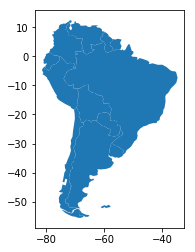

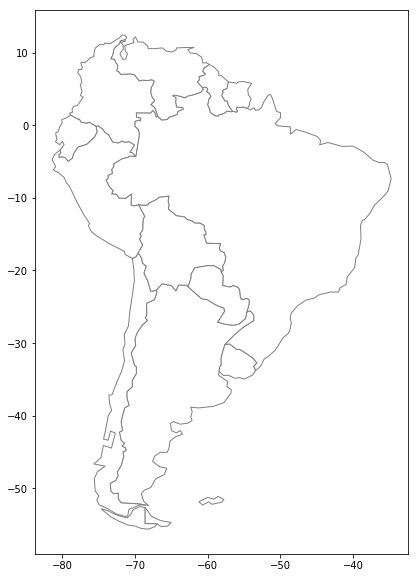

In [12]:
# Country boundaries in South America
south_america = americas.loc[americas['continent']=='South America']

# plot protected areas in South America
south_america.plot()
south_america.plot(figsize=(10,10), color='white', edgecolor='gray')
protected_areas.plot(ax=ax, alpha=0.4)


What percentage of South America is protected?

As a first step, you calculate the total area of all protected lands in South America (not including marine area).  To do this, you use the "REP_AREA" and "REP_M_AREA" columns, which contain the total area and total marine area, respectively, in square kilometers.


In [13]:
P_Area = sum(protected_areas['REP_AREA']-protected_areas['REP_M_AREA'])
print("South America has {} square kilometers of protected areas.".format(P_Area))

South America has 5396761.9116883585 square kilometers of protected areas.


Then, to finish the calculation, you'll use the `south_america` GeoDataFrame.  

In [14]:
south_america.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
9,44293293,South America,Argentina,ARG,879400.0,(POLYGON ((-68.63401022758323 -52.636370458874...
10,17789267,South America,Chile,CHL,436100.0,(POLYGON ((-68.63401022758323 -52.636370458874...
20,2931,South America,Falkland Is.,FLK,281.8,"POLYGON ((-61.2 -51.85, -60 -51.25, -59.15 -51..."
28,3360148,South America,Uruguay,URY,73250.0,POLYGON ((-57.62513342958296 -30.2162948544542...
29,207353391,South America,Brazil,BRA,3081000.0,POLYGON ((-53.37366166849824 -33.7683777809007...


Calculate the total area of South America by following these steps:
- Calculate the area of each country using the `area` attribute of each polygon (with EPSG 3035 as the CRS), and add up the results.  The calculated area will be in units of square meters.
- Convert your answer to have units of square kilometeters.

In [15]:
# Your code here: Calculate the total area of South America (in square kilometers)
totalArea = sum(south_america.geometry.to_crs(epsg=3035).area) / 10**6


<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

In [16]:
# What percentage of South America is protected?
percentage_protected = P_Area/totalArea
print('Approximately {}% of South America is protected.'.format(round(percentage_protected*100, 2)))

Approximately 30.39% of South America is protected.


### 8) Where are the birds in South America?

So, are the birds in protected areas?  

Create a plot that shows for all birds, all of the locations where they were discovered in South America.  Also plot the locations of all protected areas in South America.

To exclude protected areas that are purely marine areas (with no land component), you can use the "MARINE" column (and plot only the rows in `protected_areas[protected_areas['MARINE']!='2']`, instead of every row in the `protected_areas` GeoDataFrame).

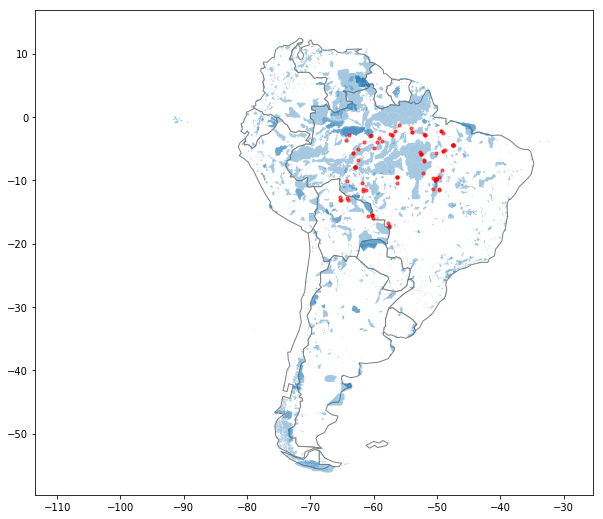

In [21]:
# Your code here
ax = south_america.plot(figsize=(10,10), color='white', edgecolor='gray')
protected_areas[protected_areas['MARINE']!='2'].plot(ax=ax, alpha=0.4, zorder=1)
birds[birds.geometry.y < 0].plot(ax=ax, color='red', alpha=0.6, markersize=10, zorder=2)

# Uncomment to see a hint
#q_8.hint()

# Keep going

Create stunning **[interactive maps](https://www.kaggle.com/alexisbcook/interactive-maps)** with your geospatial data.

---
**[Geospatial Analysis Home Page](https://www.kaggle.com/learn/geospatial-analysis)**





*Have questions or comments? Visit the [Learn Discussion forum](https://www.kaggle.com/learn-forum/161464) to chat with other Learners.*